In [1612]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering

In [1613]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]

sortset = []


for filename in os.listdir(directory):
    #print(filename)
    if filename.endswith(".txt") and '._' not in filename:
        #txtcont = txtcont + 1
        #print(filename)
        impath = os.path.join(directory, filename)
        nameset.append(impath)
        this_set = dict()
        with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
            for n in f:
                pog = n.split('\t')
                this_set[pog[0]] = pog[-1].count(',')
            f.close()
        try:
            this_set.pop('cell_name')
            this_set.pop('AB')
        except: pass
        dictset.append(this_set)
        sortset.append((impath,this_set))

print(len(dictset),len(nameset))
print(len(dictset),len(nameset))

#for n in range(0,len(snameset)): print(snameset[n])
#print(type(filename))
#for n in sorted(os.listdir(directory)): print(n)
    
#for n in range(0,len(snameset)): print(snameset[n])
nameset,dictset = [],[]


for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

truncator = len(nameset)

30 30
30 30


In [1614]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

nameset,dictset = [],[]
for n in sorted(sortset): nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))

In [1615]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [1616]:
def single_dim(namein,dictin,seps = '',tier = False):
    namelist,yaxis,xaxis = sorted(list(dictin), key = len ),[],[];target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in namelist:
            yaxis.append(dictin[n])
            xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    else:
        for n in namelist:
            if seps in n:
                target_yaxis.append(dictin[n])
                target_xaxis.append(len(re.sub(r'[A-Z]', '', n)))
            else:
                yaxis.append(dictin[n])
                xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    target_xaxis = np.array(target_xaxis)
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    namein = namein.split('/')[-1][:-4]
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2))
    plt.title('Cellular Division Timing Events in WT C. Elegans Embryo\n'+namein)
    plt.xlabel('Division Event Count');plt.ylabel('Division Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m))
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2))    
    plt.legend(loc='upper left');plt.show()

In [1617]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

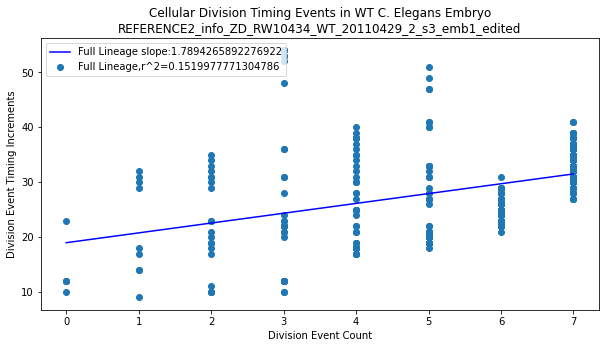

In [1618]:
single_dim(nameset[1],dictset[1])

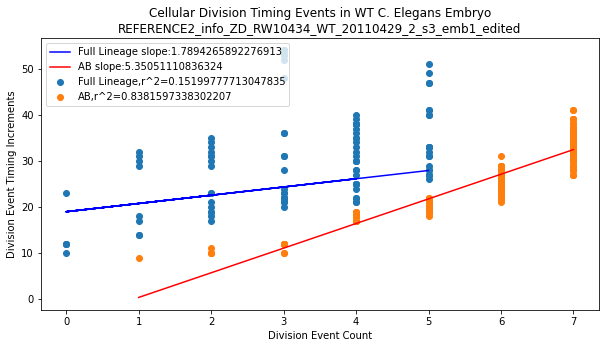

In [1619]:
single_dim(nameset[1],dictset[1], seps = 'AB')

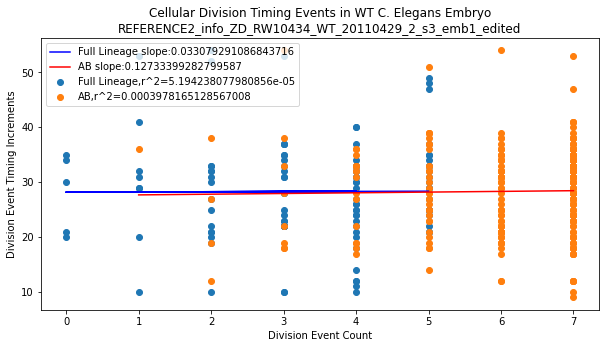

In [1620]:
single_dim(nameset[1],scrambledictset[1], seps = 'AB')

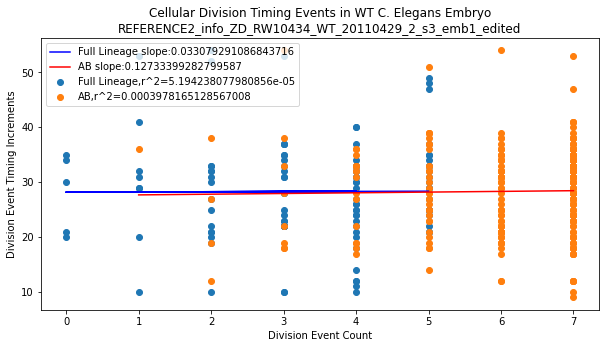

In [1621]:
single_dim(nameset[1],scrambledictset[1], seps = 'AB')

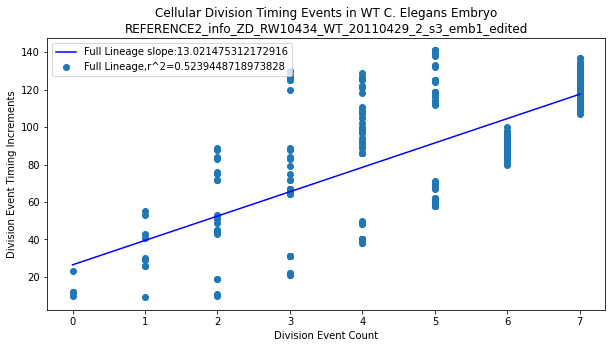

In [1622]:
single_dim(nameset[1],globaldictset[1])

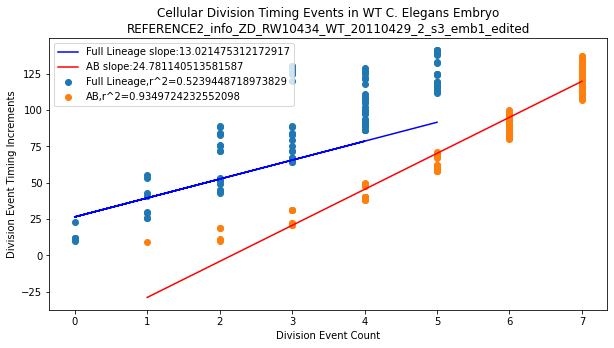

In [1623]:
single_dim(nameset[1],globaldictset[1], seps = 'AB')

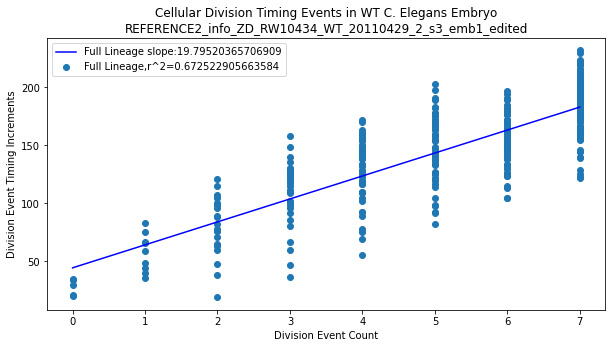

In [1624]:
single_dim(nameset[1],globalscrambledictset[1])

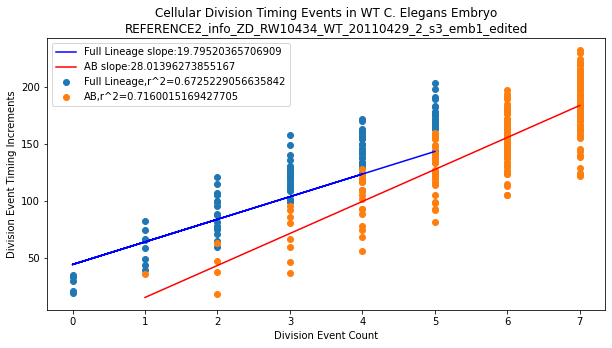

In [1625]:
single_dim(nameset[1],globalscrambledictset[1], seps = 'AB')

In [1626]:
def dict_to_scatter(name,lis,x,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(lis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()

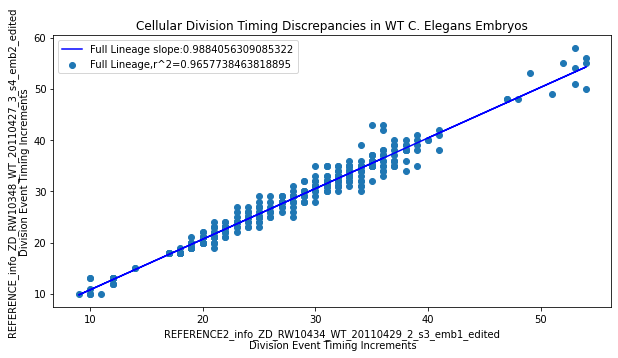

In [1627]:
dict_to_scatter(nameset,dictset,1,10,img=True)

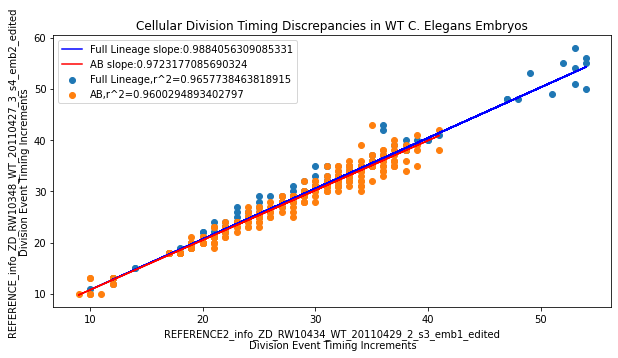

In [1628]:
dict_to_scatter(nameset,dictset,1,10,img=True,seps = 'AB')

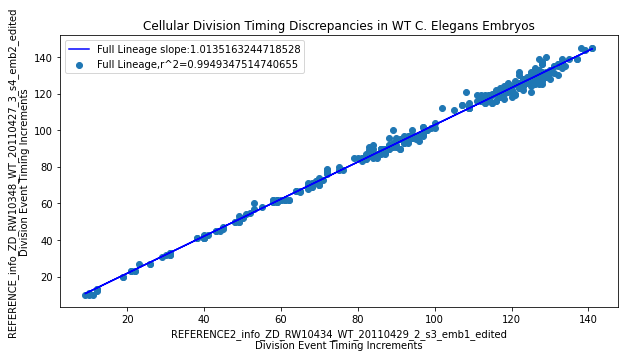

In [1629]:
dict_to_scatter(nameset,globaldictset,1,10,img=True)

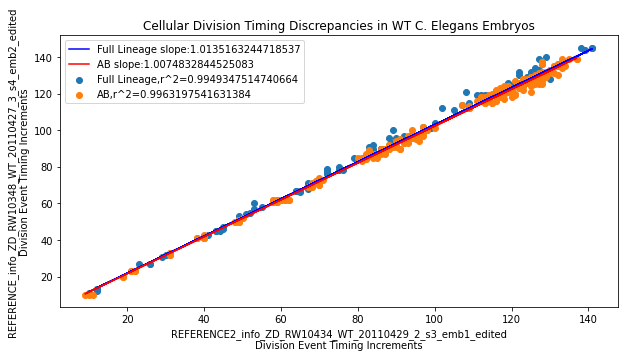

In [1630]:
dict_to_scatter(nameset,globaldictset,1,10,img=True, seps = 'AB')

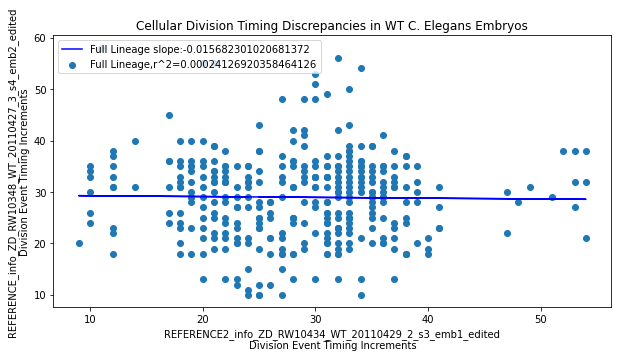

In [1631]:
dict_to_scatter(nameset,scrambledictset,1,10,img=True)

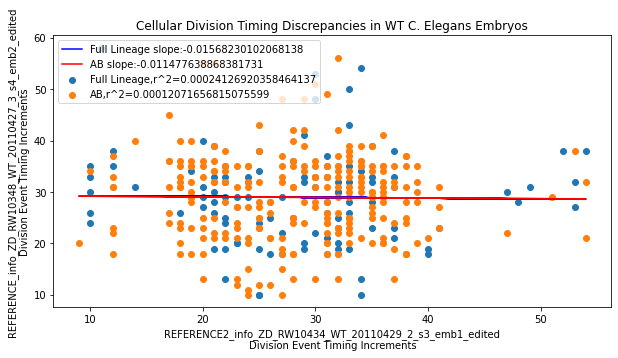

In [1632]:
dict_to_scatter(nameset,scrambledictset,1,10,img=True,seps = 'AB')

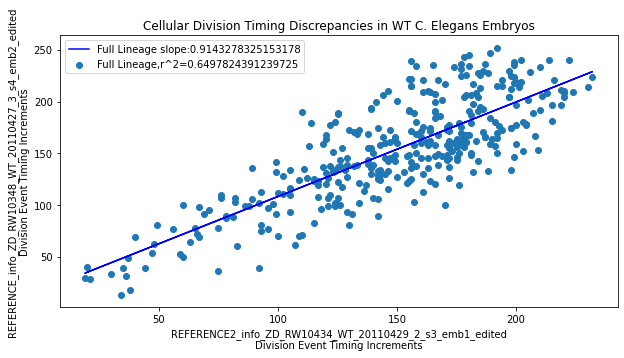

In [1633]:
dict_to_scatter(nameset,globalscrambledictset,1,10,img=True)

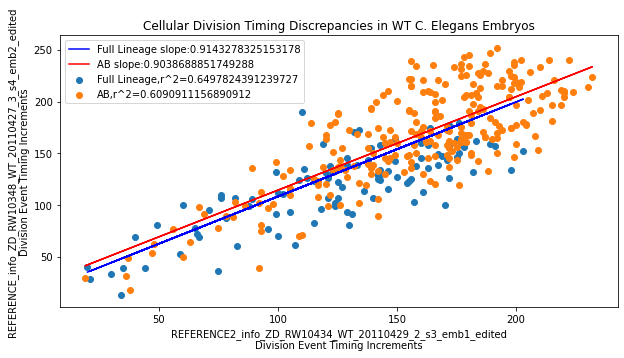

In [1634]:
dict_to_scatter(nameset,globalscrambledictset,1,10,img=True,seps = 'AB')

In [1635]:
def match_fit(xaxis,yaxis):
    sorted_xaxis = np.array(range(min(xaxis),max(xaxis)))
    xaxis = np.array(xaxis)
    p1 = np.poly1d(np.polyfit(xaxis, yaxis, 1));p2 = np.poly1d(np.polyfit(xaxis, yaxis, 2));p3 = np.poly1d(np.polyfit(xaxis, yaxis, 3))
    plt.scatter(xaxis,yaxis, label='Lineage,r^2=') 
    corr_matrix = np.corrcoef(yaxis, p1(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(xaxis, p1(xaxis), 'b-', label='linear r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p2(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p2(sorted_xaxis), 'r-', label='quad r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p3(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p3(sorted_xaxis), 'g-', label='cubic r^2:'+str(R_sq), )
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos')
    #plt.xlabel(name1+'\nDivision Event Timing Increments')
    #plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    
    plt.legend(loc='upper left')
    plt.show()

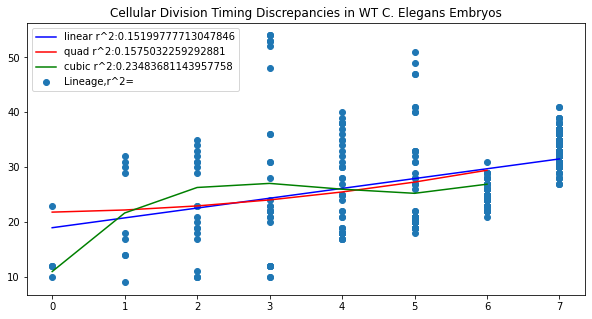

In [1636]:
x,y = single_dim(nameset[1],dictset[1],tier = True);match_fit(x,y)

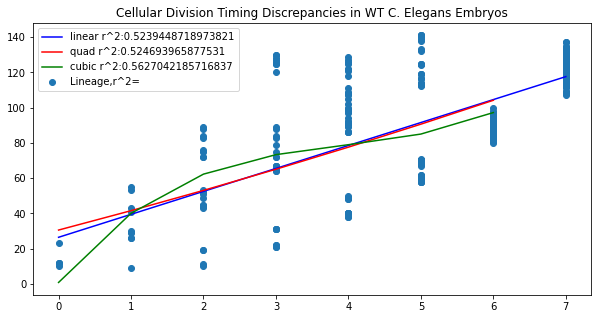

In [1637]:
x,y = single_dim(nameset[1],globaldictset[1],tier = True);match_fit(x,y)

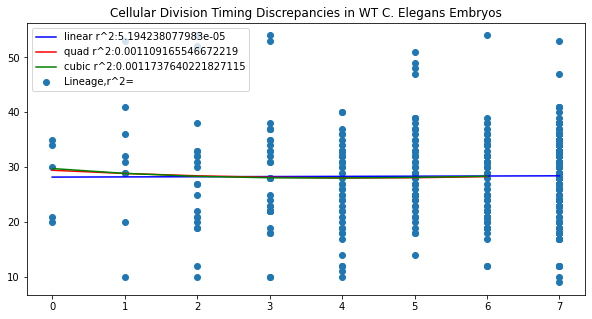

In [1638]:
x,y = single_dim(nameset[1],scrambledictset[1],tier = True);match_fit(x,y)

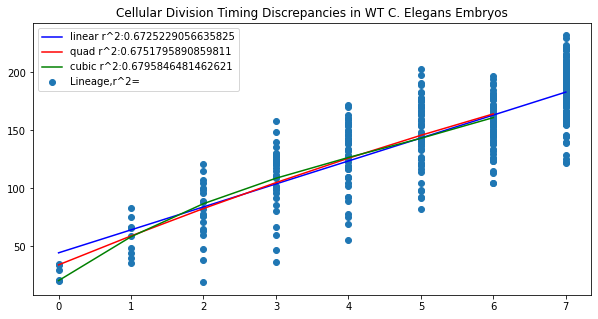

In [1639]:
x,y = single_dim(nameset[1],globalscrambledictset[1],tier = True);match_fit(x,y)

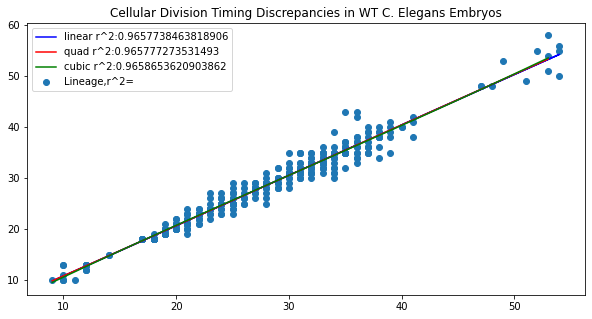

In [1640]:
x,y = dict_to_scatter(nameset,dictset,1,10,img=True,tier = True); match_fit(x,y)

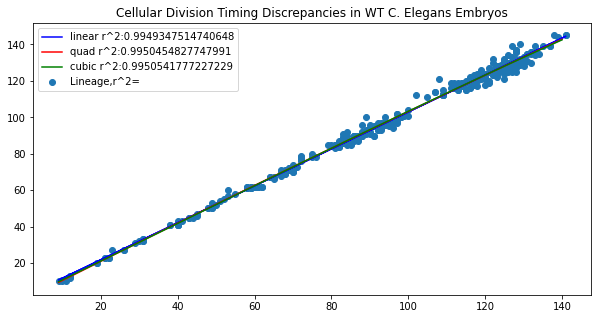

In [1641]:
x,y = dict_to_scatter(nameset,globaldictset,1,10,img=True,tier = True); match_fit(x,y)

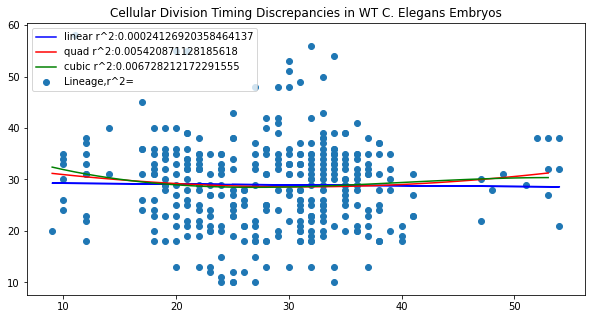

In [1642]:
x,y = dict_to_scatter(nameset,scrambledictset,1,10,img=True,tier = True); match_fit(x,y)

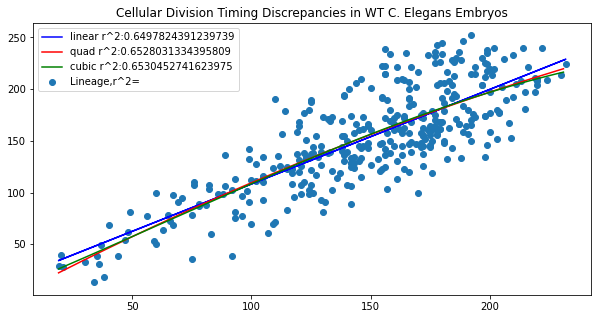

In [1643]:
x,y = dict_to_scatter(nameset,globalscrambledictset,1,10,img=True,tier = True); match_fit(x,y)

In [1644]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    #n = 40
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(8, 8)
    plt.show()

In [1645]:
'''
https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py
'''

'\nhttps://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py\n'

In [1646]:
r_mat = [];g_mat = [];s_mat=[];gs_mat=[]
for n in range(0,len(nameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,n+1):
        m2,b,r,name1,name2 = dict_to_scatter(nameset,dictset,n,m)
        r_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter(nameset,globaldictset,n,m)
        g_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter(nameset,scrambledictset,n,m)
        s_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter(nameset,globalscrambledictset,n,m)
        gs_row.append(r**2)
    zee = ( [0] * (30 - m - 1))
    r_mat.append(r_row+zee);g_mat.append(g_row+zee);s_mat.append(s_row+zee);gs_mat.append(gs_row+zee)
    #print(len(zee))
#r_mat.reverse()
r_mat = (np.mat(r_mat).T + np.mat(r_mat)) - np.diag([1]*len(r_mat))
g_mat = (np.mat(g_mat).T + np.mat(g_mat)) - np.diag([1]*len(g_mat))
s_mat = (np.mat(s_mat).T + np.mat(s_mat)) - np.diag([1]*len(s_mat))
gs_mat = (np.mat(gs_mat).T + np.mat(gs_mat)) - np.diag([1]*len(gs_mat))

sorttypes = ['cycle time','birth time', 'T.E.D', 'B.E.D. Cycle Time','B.E.D. Birth Time']
sortlists = []

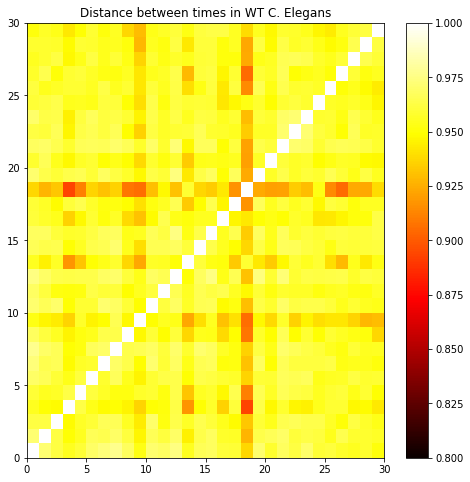

In [1647]:
plot_2_examples(['hot'],np.mat(r_mat)) #r^2 of plots

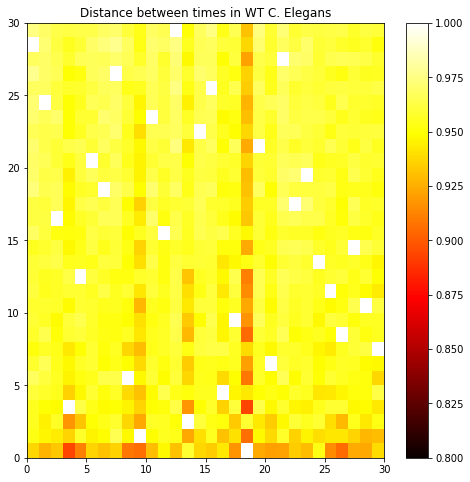

[matrix([[18,  9, 13,  3, 16,  8, 20, 29, 26, 17, 28, 25,  4, 24, 27, 11,
           2, 22,  6, 23,  5, 19, 14, 10,  1, 15,  7, 21,  0, 12]])]

In [1648]:
x = np.argsort(r_mat.sum(axis=0))
plot_2_examples(['hot'],np.mat(r_mat[x][0]))
sortlists.append(x)
sortlists

In [1649]:
#clustering = AgglomerativeClustering(n_clusters = 2).fit(np.mat(r_mat))
#np.where(clustering.labels_ > 0)

In [1650]:
r_mat.sum(axis=0)

matrix([[28.91991632, 28.83371241, 28.77419924, 28.49735219, 28.70692377,
         28.81173072, 28.81037383, 28.87152839, 28.60572842, 28.33619908,
         28.82995953, 28.75655509, 28.92098367, 28.46016289, 28.82429901,
         28.86602903, 28.56894434, 28.64920352, 27.90390211, 28.81672785,
         28.61385308, 28.90659018, 28.78947547, 28.81084888, 28.71001159,
         28.66969973, 28.64392482, 28.7117999 , 28.66099648, 28.63090471]])

In [1651]:
np.sort(r_mat.sum(axis=0))

matrix([[27.90390211, 28.33619908, 28.46016289, 28.49735219, 28.56894434,
         28.60572842, 28.61385308, 28.63090471, 28.64392482, 28.64920352,
         28.66099648, 28.66969973, 28.70692377, 28.71001159, 28.7117999 ,
         28.75655509, 28.77419924, 28.78947547, 28.81037383, 28.81084888,
         28.81173072, 28.81672785, 28.82429901, 28.82995953, 28.83371241,
         28.86602903, 28.87152839, 28.90659018, 28.91991632, 28.92098367]])

In [1652]:
np.argsort(r_mat.sum(axis=0))

matrix([[18,  9, 13,  3, 16,  8, 20, 29, 26, 17, 28, 25,  4, 24, 27, 11,
          2, 22,  6, 23,  5, 19, 14, 10,  1, 15,  7, 21,  0, 12]])

In [1653]:
#This plots all of the distances between nodes
'''trip = np.triu(np.mat(r_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )'''
''''''

''

(array([1., 0., 0., 0., 0., 0., 1., 0., 2., 1., 5., 5., 2., 8., 5.]),
 array([27.90390211, 27.97170755, 28.03951299, 28.10731842, 28.17512386,
        28.2429293 , 28.31073473, 28.37854017, 28.44634561, 28.51415105,
        28.58195648, 28.64976192, 28.71756736, 28.7853728 , 28.85317823,
        28.92098367]),
 <BarContainer object of 15 artists>)

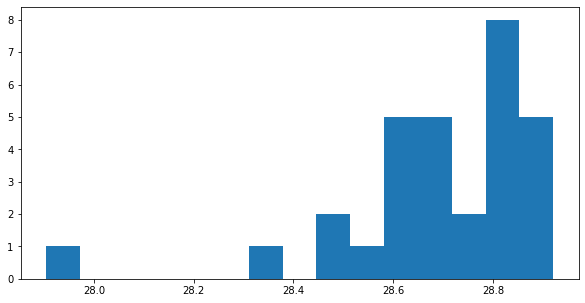

In [1698]:
#returns aggregate distances between nodes
#rip = np.triu(np.mat(r_mat))
#trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

trip = r_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )

' '

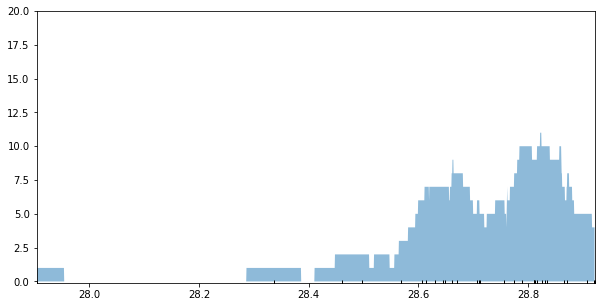

In [1699]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .05) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 20]);
''' '''

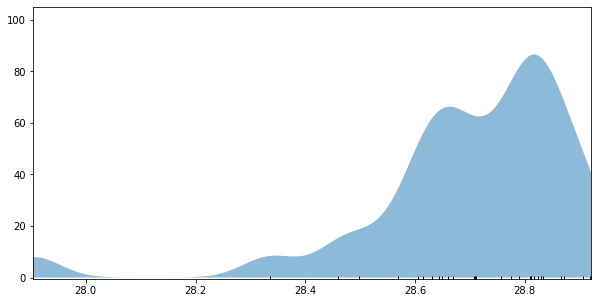

In [1701]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.05).pdf(x_d) for xi in trip) * 1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.5), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 105]);

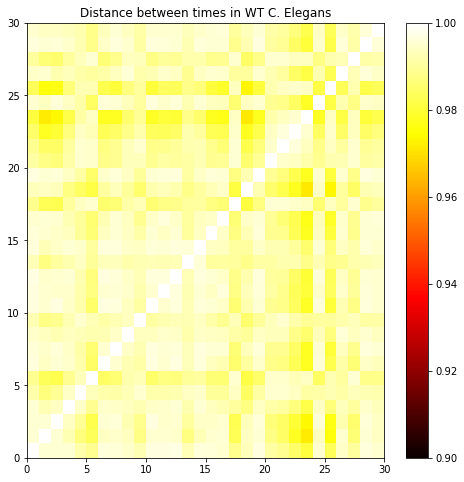

In [1657]:
plot_2_examples(['hot'],np.mat(g_mat)) #r^2 of 

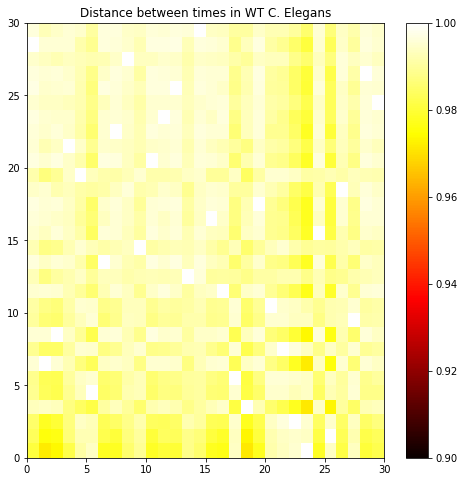

[matrix([[18,  9, 13,  3, 16,  8, 20, 29, 26, 17, 28, 25,  4, 24, 27, 11,
           2, 22,  6, 23,  5, 19, 14, 10,  1, 15,  7, 21,  0, 12]]),
 matrix([[23, 25, 22, 18,  5, 17,  1, 21,  2, 27, 20, 16, 13,  6,  9, 24,
          15, 19, 26,  4, 10,  3,  7, 11, 29, 12, 28,  8,  0, 14]])]

In [1658]:
x = np.argsort(g_mat.sum(axis=0))
plot_2_examples(['hot'],np.mat(g_mat[x][0]))
sortlists.append(x)
sortlists

(array([1., 0., 1., 0., 0., 1., 1., 0., 1., 2., 3., 4., 7., 7., 2.]),
 array([29.52227739, 29.54137163, 29.56046587, 29.57956011, 29.59865434,
        29.61774858, 29.63684282, 29.65593706, 29.6750313 , 29.69412554,
        29.71321977, 29.73231401, 29.75140825, 29.77050249, 29.78959673,
        29.80869096]),
 <BarContainer object of 15 artists>)

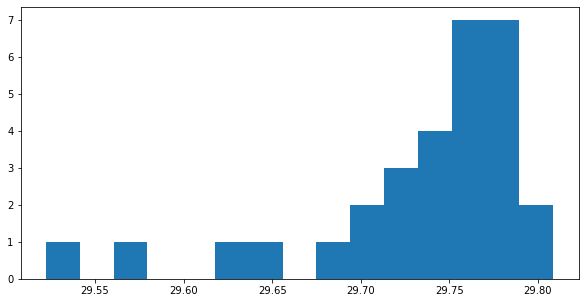

In [1702]:
'''trip = np.triu(np.mat(g_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )
'''

trip = g_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )

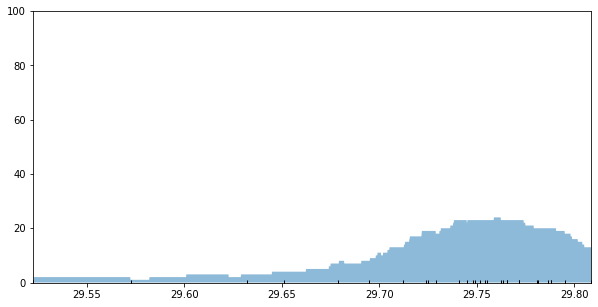

In [1710]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .05) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 100]);

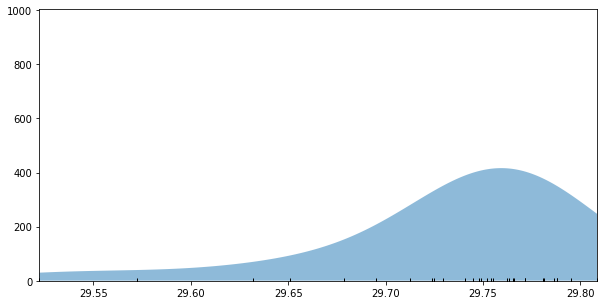

In [1713]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.04).pdf(x_d) for xi in trip) * 2
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.5), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1005]);

In [1662]:
#plot_2_examples(['hot'],np.mat(s_mat))

In [1663]:
'''trip = np.triu(np.mat(s_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )'''

'trip = np.triu(np.mat(s_mat))\ntrip = np.sort(trip.flatten())\ntrip = trip[int(len(trip)/2):-truncator]\n\nplt.hist(trip, bins = truncator )'

In [1664]:
#plot_2_examples(['hot'],np.mat(gs_mat))

In [1665]:
'''trip = np.triu(np.mat(gs_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )'''

'trip = np.triu(np.mat(gs_mat))\ntrip = np.sort(trip.flatten())\ntrip = trip[int(len(trip)/2):-truncator]\n\nplt.hist(trip, bins = truncator )'

In [1666]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 0.02) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 120]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 0.02) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 120]);"

In [1667]:
def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))
#I guess issa metric
ted_list = []
t_mat = []
for n in range(0,len(nameset)):
    r_row = []
    for m in range(0,n+1):
        k = tree_edit_distance(dictset[n],dictset[m])
        r_row.append(k)
        ted_list.append(k)
    zee = ( [0] * (30 - m - 1))
    t_mat.append(r_row+zee)

t_mat = (np.mat(t_mat).T + np.mat(t_mat)) - np.diag([1]*len(t_mat))

#for n in ted_list: print(n)

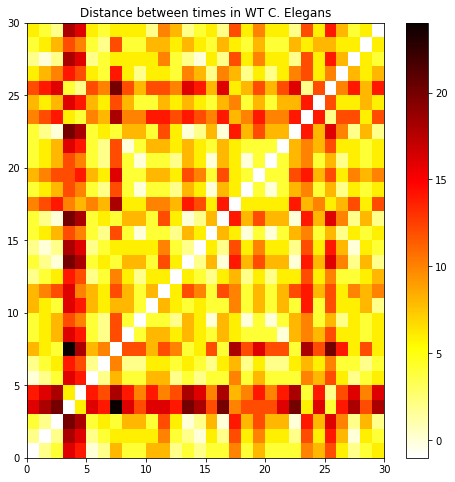

In [1668]:
plot_2_examples(['hot_r'],np.mat(t_mat))

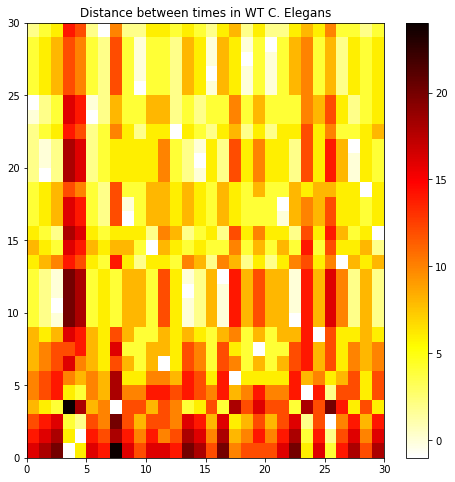

[matrix([[18,  9, 13,  3, 16,  8, 20, 29, 26, 17, 28, 25,  4, 24, 27, 11,
           2, 22,  6, 23,  5, 19, 14, 10,  1, 15,  7, 21,  0, 12]]),
 matrix([[23, 25, 22, 18,  5, 17,  1, 21,  2, 27, 20, 16, 13,  6,  9, 24,
          15, 19, 26,  4, 10,  3,  7, 11, 29, 12, 28,  8,  0, 14]]),
 matrix([[ 3,  4, 25,  7, 23, 17, 11, 19, 24, 22,  2, 13, 16, 26, 10, 29,
           8, 21, 28,  1, 14, 27, 12,  5,  0,  9, 15, 18, 20,  6]])]

In [1669]:
x = np.argsort(t_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
plot_2_examples(['hot_r'],np.mat(t_mat[x][0]))
sortlists.append(x)
sortlists

(array([7., 5., 4., 5., 1., 2., 1., 0., 1., 2., 0., 1., 0., 0., 1.]),
 array([151. , 169.4, 187.8, 206.2, 224.6, 243. , 261.4, 279.8, 298.2,
        316.6, 335. , 353.4, 371.8, 390.2, 408.6, 427. ]),
 <BarContainer object of 15 artists>)

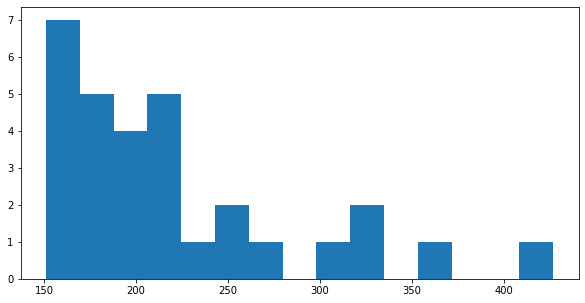

In [1714]:
'''trip = np.triu(np.mat(t_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )'''

trip = t_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )

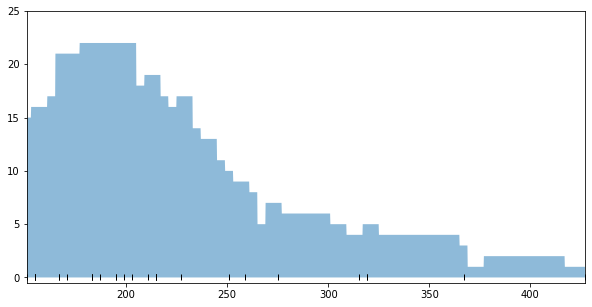

In [1715]:
''' 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
https://www.wessa.net/rwasp_density.wasp#output
'''

x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 50) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.5, 25]);

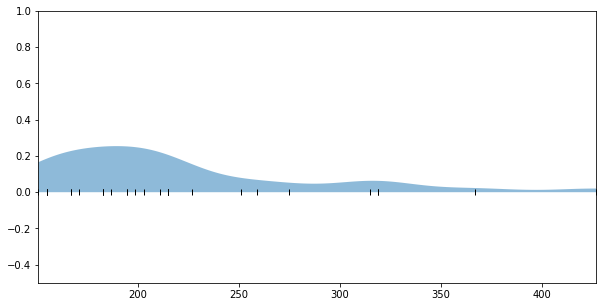

In [1716]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,20).pdf(x_d) for xi in trip) *1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1]);

In [1673]:
'''ted_mat_reals = np.where(-abs(np.array(t_mat)-20)+19 > 0, -1, 0)
#for n in range(len(np.array(ted_mat_real))): ted_mat_real[n][n] = (-np.sum(np.array(ted_mat_real)[n]))
#print(ted_mat_real)
plot_2_examples(['hot'],np.mat(ted_mat_reals)) #black are edges'''

"ted_mat_reals = np.where(-abs(np.array(t_mat)-20)+19 > 0, -1, 0)\n#for n in range(len(np.array(ted_mat_real))): ted_mat_real[n][n] = (-np.sum(np.array(ted_mat_real)[n]))\n#print(ted_mat_real)\nplot_2_examples(['hot'],np.mat(ted_mat_reals)) #black are edges"

In [1674]:
def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [1675]:
b_mat = [];bg_mat = [];bs_mat=[];bgs_mat=[]

for n in range(0,len(nameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,n+1):
        r_row.append(branch_distance(dictset[n],dictset[m]))
        g_row.append(branch_distance(globaldictset[n],globaldictset[m]))
        s_row.append(branch_distance(scrambledictset[n],scrambledictset[m]))
        gs_row.append(branch_distance(globalscrambledictset[n],globalscrambledictset[m]))
    zee = ( [0] * (30 - m - 1))
    b_mat.append(r_row+zee);bg_mat.append(g_row+zee);bs_mat.append(s_row+zee);bgs_mat.append(gs_row+zee)
    #print(len(zee))
#r_mat.reverse()
b_mat = (np.mat(b_mat).T + np.mat(b_mat)) - np.diag([1]*len(b_mat))
bg_mat = (np.mat(bg_mat).T + np.mat(bg_mat)) - np.diag([1]*len(bg_mat))
bs_mat = (np.mat(bs_mat).T + np.mat(bs_mat)) - np.diag([1]*len(bs_mat))
bgs_mat = (np.mat(bgs_mat).T + np.mat(bgs_mat)) - np.diag([1]*len(bgs_mat))

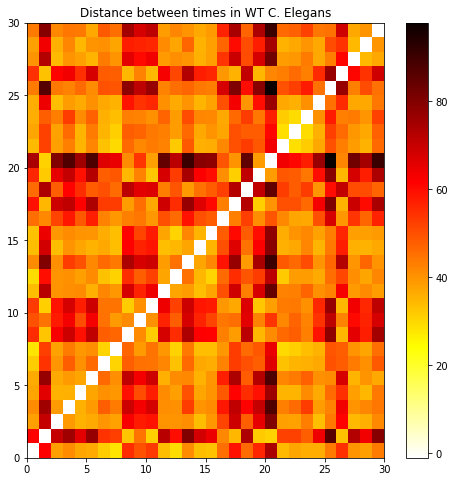

In [1676]:
plot_2_examples(['hot_r'],np.mat(b_mat))

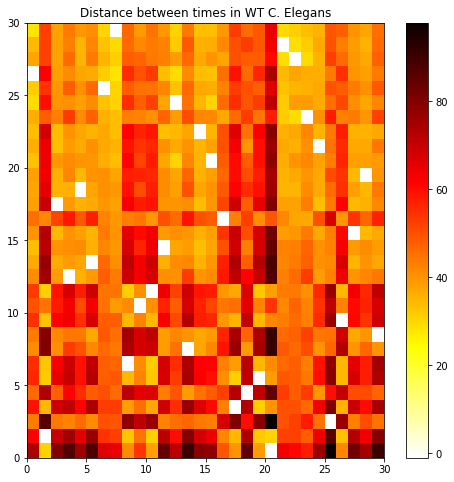

[matrix([[18,  9, 13,  3, 16,  8, 20, 29, 26, 17, 28, 25,  4, 24, 27, 11,
           2, 22,  6, 23,  5, 19, 14, 10,  1, 15,  7, 21,  0, 12]]),
 matrix([[23, 25, 22, 18,  5, 17,  1, 21,  2, 27, 20, 16, 13,  6,  9, 24,
          15, 19, 26,  4, 10,  3,  7, 11, 29, 12, 28,  8,  0, 14]]),
 matrix([[ 3,  4, 25,  7, 23, 17, 11, 19, 24, 22,  2, 13, 16, 26, 10, 29,
           8, 21, 28,  1, 14, 27, 12,  5,  0,  9, 15, 18, 20,  6]]),
 matrix([[20,  1, 25, 17, 18, 19,  8, 13, 29, 26,  9, 10,  3,  5, 11, 27,
          16,  2,  4, 28, 15, 24, 14, 23, 12,  6,  0, 22, 21,  7]])]

In [1677]:
x = np.argsort(b_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
plot_2_examples(['hot_r'],np.mat(b_mat[x][0]))
sortlists.append(x)
sortlists

(array([3., 4., 5., 4., 1., 0., 6., 2., 2., 2., 0., 0., 0., 0., 1.]),
 array([1185.33521984, 1237.25594011, 1289.17666038, 1341.09738064,
        1393.01810091, 1444.93882118, 1496.85954145, 1548.78026172,
        1600.70098199, 1652.62170226, 1704.54242253, 1756.4631428 ,
        1808.38386307, 1860.30458334, 1912.22530361, 1964.14602388]),
 <BarContainer object of 15 artists>)

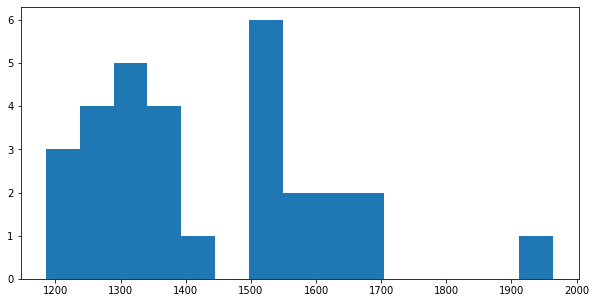

In [1717]:
'''
trip = np.triu(np.mat(b_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )

'''
trip = b_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )



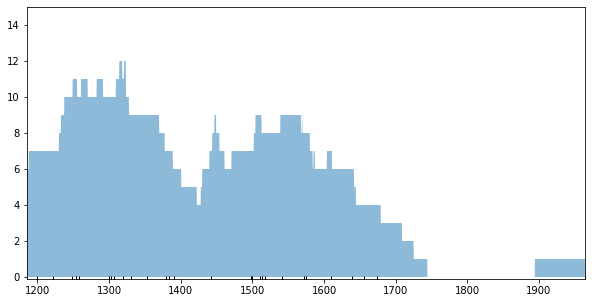

In [1720]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 70) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 15]);

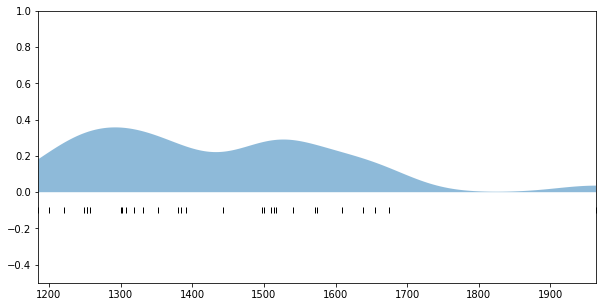

In [1721]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,55).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1]);

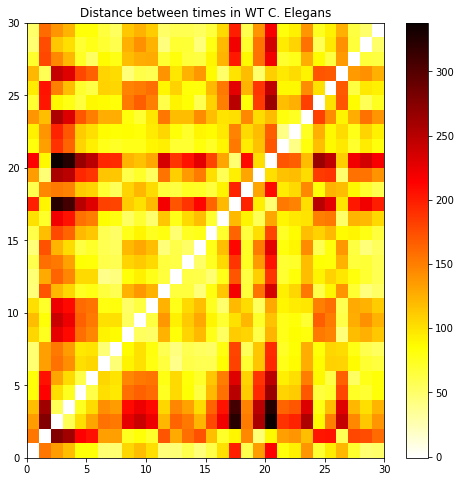

In [1681]:
plot_2_examples(['hot_r'],np.mat(bg_mat))

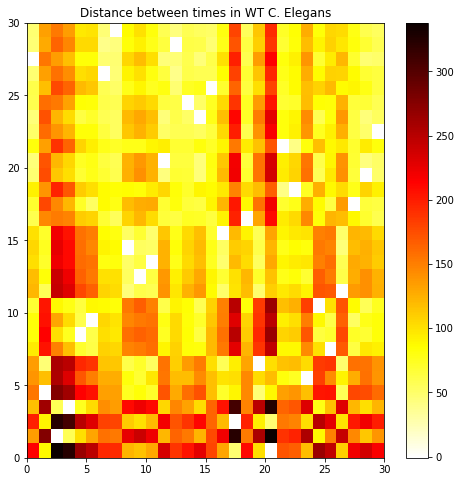

[matrix([[18,  9, 13,  3, 16,  8, 20, 29, 26, 17, 28, 25,  4, 24, 27, 11,
           2, 22,  6, 23,  5, 19, 14, 10,  1, 15,  7, 21,  0, 12]]),
 matrix([[23, 25, 22, 18,  5, 17,  1, 21,  2, 27, 20, 16, 13,  6,  9, 24,
          15, 19, 26,  4, 10,  3,  7, 11, 29, 12, 28,  8,  0, 14]]),
 matrix([[ 3,  4, 25,  7, 23, 17, 11, 19, 24, 22,  2, 13, 16, 26, 10, 29,
           8, 21, 28,  1, 14, 27, 12,  5,  0,  9, 15, 18, 20,  6]]),
 matrix([[20,  1, 25, 17, 18, 19,  8, 13, 29, 26,  9, 10,  3,  5, 11, 27,
          16,  2,  4, 28, 15, 24, 14, 23, 12,  6,  0, 22, 21,  7]]),
 matrix([[20,  2, 17,  3,  1, 23, 19, 25,  4,  5, 24, 26,  9, 10,  8, 16,
          18, 27, 22, 28, 11, 21, 29, 14, 13, 15,  6,  0, 12,  7]])]

In [1682]:
x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
plot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))
sortlists.append(x)
sortlists

(array([6., 5., 6., 1., 4., 3., 0., 0., 1., 0., 0., 1., 1., 1., 1.]),
 array([2627.53823139, 2819.435557  , 3011.33288261, 3203.23020821,
        3395.12753382, 3587.02485943, 3778.92218504, 3970.81951064,
        4162.71683625, 4354.61416186, 4546.51148747, 4738.40881307,
        4930.30613868, 5122.20346429, 5314.1007899 , 5505.99811551]),
 <BarContainer object of 15 artists>)

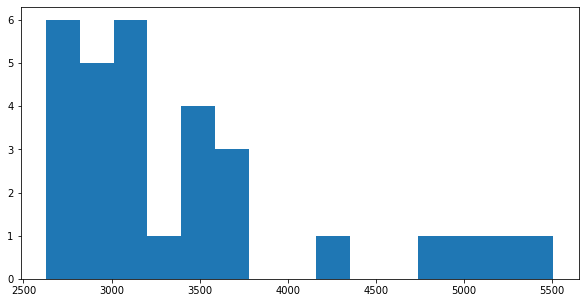

In [1722]:
'''
trip = np.triu(np.mat(bg_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins =truncator )'''

trip = bg_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )


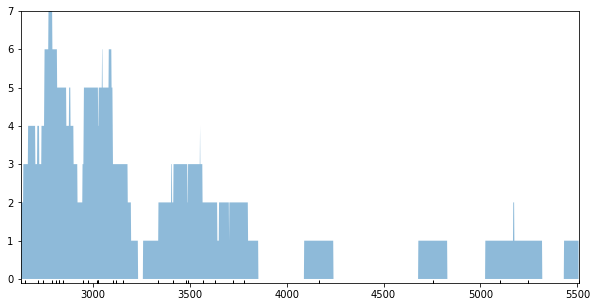

In [1723]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 75) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 7]);

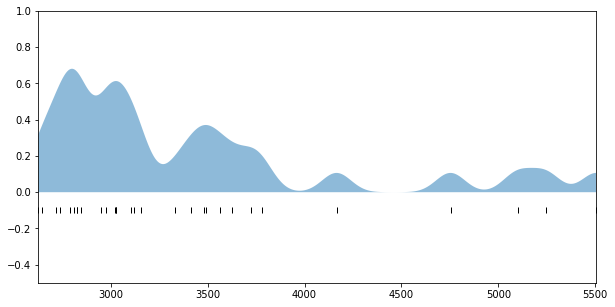

In [1724]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,75).pdf(x_d) for xi in trip) * 20
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1]);

In [1686]:
#plot_2_examples(['hot_r'],np.mat(bs_mat))

In [1687]:
'''trip = np.triu(np.mat(bs_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )'''
''''''

''

In [1688]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 5) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 110]);''' 

''''''

''

In [1689]:
#plot_2_examples(['hot_r'],np.mat(bgs_mat))

In [1690]:
'''trip = np.triu(np.mat(bgs_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )'''
''''''

''

In [1691]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 50) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 170]);'''
''''''

''

In [1692]:
#for n in rem_dang_ranks:
#    print(n,type(n))

In [1693]:
sortlists

[matrix([[18,  9, 13,  3, 16,  8, 20, 29, 26, 17, 28, 25,  4, 24, 27, 11,
           2, 22,  6, 23,  5, 19, 14, 10,  1, 15,  7, 21,  0, 12]]),
 matrix([[23, 25, 22, 18,  5, 17,  1, 21,  2, 27, 20, 16, 13,  6,  9, 24,
          15, 19, 26,  4, 10,  3,  7, 11, 29, 12, 28,  8,  0, 14]]),
 matrix([[ 3,  4, 25,  7, 23, 17, 11, 19, 24, 22,  2, 13, 16, 26, 10, 29,
           8, 21, 28,  1, 14, 27, 12,  5,  0,  9, 15, 18, 20,  6]]),
 matrix([[20,  1, 25, 17, 18, 19,  8, 13, 29, 26,  9, 10,  3,  5, 11, 27,
          16,  2,  4, 28, 15, 24, 14, 23, 12,  6,  0, 22, 21,  7]]),
 matrix([[20,  2, 17,  3,  1, 23, 19, 25,  4,  5, 24, 26,  9, 10,  8, 16,
          18, 27, 22, 28, 11, 21, 29, 14, 13, 15,  6,  0, 12,  7]])]

In [1694]:
def aggregate_rank_function(x):
    #reflist = sorted(x[0][0])
    reflist = sorted(x[0].tolist()[0]);ranklist = []
    for n in reflist:
        gimp = 0
        for m in x:
            k = m.tolist()[0]; gimp = gimp + k.index(n)
        ranklist.append((n,gimp))
    return ranklist

x = aggregate_rank_function(sortlists)
x.sort(key=lambda x:x[1])
x

[(25, 23),
 (17, 24),
 (3, 39),
 (20, 44),
 (18, 50),
 (23, 51),
 (2, 52),
 (1, 54),
 (13, 56),
 (19, 56),
 (4, 58),
 (16, 58),
 (26, 59),
 (9, 62),
 (24, 67),
 (8, 68),
 (5, 69),
 (22, 73),
 (27, 76),
 (29, 76),
 (11, 78),
 (10, 81),
 (28, 92),
 (21, 100),
 (7, 109),
 (6, 111),
 (15, 112),
 (14, 116),
 (12, 128),
 (0, 133)]

In [1695]:
def dist_seqences(l1,l2):
    l1 = l1.tolist()[0]; l2 = l2.tolist()[0]
    if len(l1) != len(l2): return False
    for n in range(0,len(l1)):
        #o,k = set(l1[0:n]),set(l2[0:n])
        #print(o)
        print(l1[n],l2[n])
        
        #print(n,l1[n],l2[n])

In [1696]:
#dist_seqences(sortlists[1],sortlists[0])

In [1697]:
#sortlists[1][0][0]